In [1]:
setwd("G:\\My Drive\\SDM_China")
library("rstan")
library(gdata)
#library(bayesplot)
library(raster)
library(rgdal)
library(sp)
library(spdep)
library(data.table)

Warning message:
"package 'rstan' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.4.4"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.
Warning message:
"package 'gdata' was built under R version 3.4.4"gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
g

In [2]:
### Get data on China
china<-readOGR(dsn = "data\\china_counties", layer = "china_counties")

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\data\china_counties", layer: "china_counties"
with 2409 features
It has 39 fields


In [3]:
### Get the data on counties adjacency
adjacency<-read.csv("data\\china_counties\\adjacency.csv")
node1<-adjacency$node1
node2<-adjacency$node2
N_edges<-length(node1)
N<-nrow(china@data)

In [4]:
### Define Stan model
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size is an integer with the lowest value of 1 (i.e. positive)
 vector[N] x; // Predictor is a vector of the size of sample size
 vector[N] y; // Outcome is a vector of a size of sample size
}

parameters {
 real alpha; // Intercept is an unconstrained continous value
 real beta; // Slope (regression coefficients) is an unconstrained continous value
 real beta2; // Slope (regression coefficients) is an unconstrained continous value
 real < lower = 0 > sigma; // Error SD is an unconstrained positive continous valeu
}

model {
 log (y) ~ normal(alpha + x * beta + square(x) * beta2 , sigma); //this seem to declare the model
}
generated quantities {
} // The posterior predictive distribution",

"stan_models\\buckwheat_simple_log_BIO9_2.stan")

In [5]:
stan_model <- "stan_models\\buckwheat_simple_log_BIO9_2.stan"

In [6]:
colnames(china@data)

[1] "ID_0"    "ISO"     "NAME_0"  "ID_1"    "NAME_1"  "ID_2"    "NAME_2" 
 [8] "ID_3"    "NAME_3"  "TYPE_3"  "ENGTYPE" "NL_NAME" "VARNAME" "BIO_01" 
[15] "BIO_02"  "BIO_03"  "BIO_04"  "BIO_05"  "BIO_06"  "BIO_07"  "BIO_08" 
[22] "BIO_09"  "BIO_10"  "BIO_11"  "BIO_12"  "BIO_13"  "BIO_14"  "BIO_15" 
[29] "BIO_16"  "BIO_17"  "BIO_18"  "BIO_19"  "HrvstAF" "HrvsAHS" "HrvsAHM"
[36] "PrdctnS" "PrdctnM" "YldPrHc" "HrvsAF_"

In [50]:
x<-china@data$BIO_09
y<-china@data$HrvstAF
y[y == 0] <- 1.0e-14
logy<-log(y)

In [36]:
stan_data <- list(N = N, x = x, y = y)

In [125]:
colnames(china@data)

[1] "ID_0"    "ISO"     "NAME_0"  "ID_1"    "NAME_1"  "ID_2"    "NAME_2" 
 [8] "ID_3"    "NAME_3"  "TYPE_3"  "ENGTYPE" "NL_NAME" "VARNAME" "BIO_01" 
[15] "BIO_02"  "BIO_03"  "BIO_04"  "BIO_05"  "BIO_06"  "BIO_07"  "BIO_08" 
[22] "BIO_09"  "BIO_10"  "BIO_11"  "BIO_12"  "BIO_13"  "BIO_14"  "BIO_15" 
[29] "BIO_16"  "BIO_17"  "BIO_18"  "BIO_19"  "HrvstAF" "HrvsAHS" "HrvsAHM"
[36] "PrdctnS" "PrdctnM" "YldPrHc" "HrvsAF_"

In [37]:
str(stan_data)

List of 3
 $ N: int 2409
 $ x: num [1:2409] 5.76 6.29 4.86 7.84 7.11 ...
 $ y: num [1:2409] 0.000684 0.000457 0.000234 0.000237 0.000249 ...


In [38]:
fit <- stan(file = stan_model, data = stan_data, warmup = 500, iter = 1000, chains = 4, cores = 8, thin = 1)


SAMPLING FOR MODEL 'buckwheat_simple_log_BIO9_2' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 3.911 seconds (Warm-up)
Chain 1:                3.372 seconds (Sampling)
Chain 1:                7.283 s

In [111]:
save(fit, file="stan_models\\buckwheat_simple_log_BIO9_2.R")

In [39]:
### Extract posterios distribution
posterior <- rstan::extract(fit)
str(posterior)

List of 5
 $ alpha: num [1:500(1d)] -6.72 -6.7 -6.73 -6.85 -6.81 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ beta : num [1:500(1d)] -0.01978 -0.00411 0.00347 -0.02031 -0.00375 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ beta2: num [1:500(1d)] -0.00948 -0.01023 -0.00931 -0.00959 -0.00895 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ sigma: num [1:500(1d)] 2.81 2.74 2.71 2.71 2.8 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ lp__ : num [1:500(1d)] -3648 -3648 -3650 -3650 -3647 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


In [40]:
fit

Inference for Stan model: buckwheat_simple_log_BIO9_2.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

          mean se_mean   sd     2.5%      25%      50%      75%    97.5% n_eff
alpha    -6.80    0.01 0.08    -6.96    -6.85    -6.80    -6.75    -6.64   234
beta     -0.01    0.00 0.01    -0.02    -0.02    -0.01    -0.01     0.00   320
beta2    -0.01    0.00 0.00    -0.01    -0.01    -0.01    -0.01    -0.01   341
sigma     2.76    0.00 0.04     2.69     2.74     2.76     2.79     2.84   301
lp__  -3647.68    0.10 1.40 -3650.94 -3648.58 -3647.40 -3646.57 -3645.81   194
      Rhat
alpha 1.02
beta  1.00
beta2 1.02
sigma 1.00
lp__  1.00

Samples were drawn using NUTS(diag_e) at Thu Oct 03 15:00:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [43]:
colnames(china@data)

[1] "ID_0"    "ISO"     "NAME_0"  "ID_1"    "NAME_1"  "ID_2"    "NAME_2" 
 [8] "ID_3"    "NAME_3"  "TYPE_3"  "ENGTYPE" "NL_NAME" "VARNAME" "BIO_01" 
[15] "BIO_02"  "BIO_03"  "BIO_04"  "BIO_05"  "BIO_06"  "BIO_07"  "BIO_08" 
[22] "BIO_09"  "BIO_10"  "BIO_11"  "BIO_12"  "BIO_13"  "BIO_14"  "BIO_15" 
[29] "BIO_16"  "BIO_17"  "BIO_18"  "BIO_19"  "HrvstAF" "HrvsAHS" "HrvsAHM"
[36] "PrdctnS" "PrdctnM" "YldPrHc" "HrvsAF_"

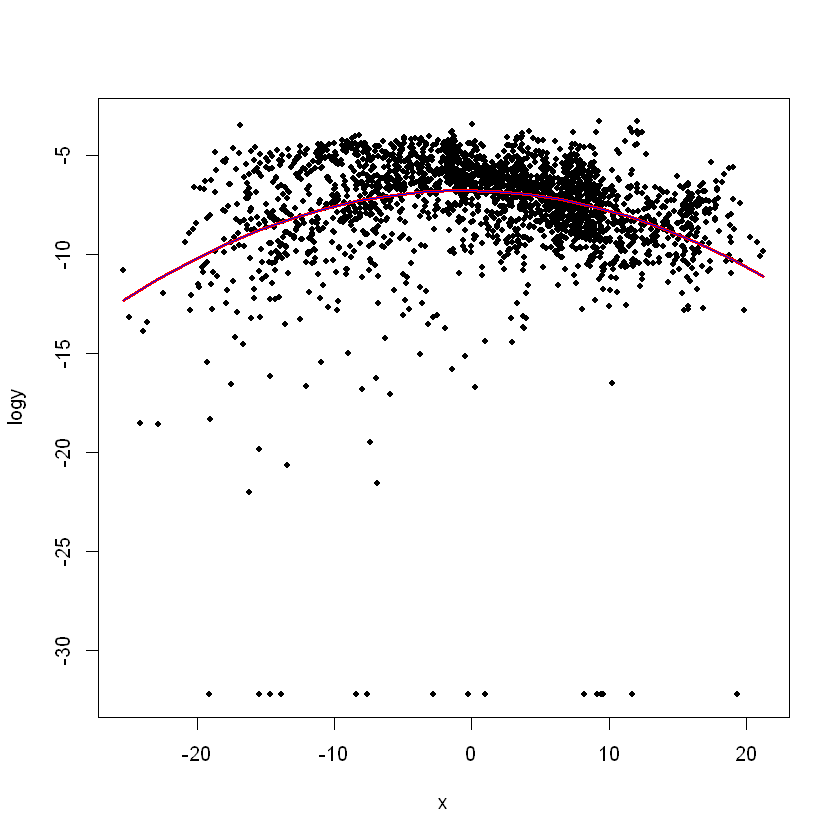

In [51]:
plot(logy ~ x, pch = 20)

## This predicts the values for lm model:
x0 <- seq(min(x), max(x), length = 20)  ## prediction grid
y0 <-  mean(posterior$alpha) + mean(posterior$beta)*x0 + mean(posterior$beta2)*(x0^2) ## predicted values
lines(x0, y0, col = "red",lwd=3)
y1 <-  quantile(posterior$alpha)[[2]] + quantile(posterior$beta)[[2]]*x0 + quantile(posterior$beta2)[[2]]*(x0^2) ## predicted values
lines(x0, y0, col = "blue",lwd=1)
y1 <-  quantile(posterior$alpha)[[3]] + quantile(posterior$beta)[[3]]*x0 + quantile(posterior$beta2)[[3]]*(x0^2) ## predicted values
lines(x0, y0, col = "blue",lwd=1)

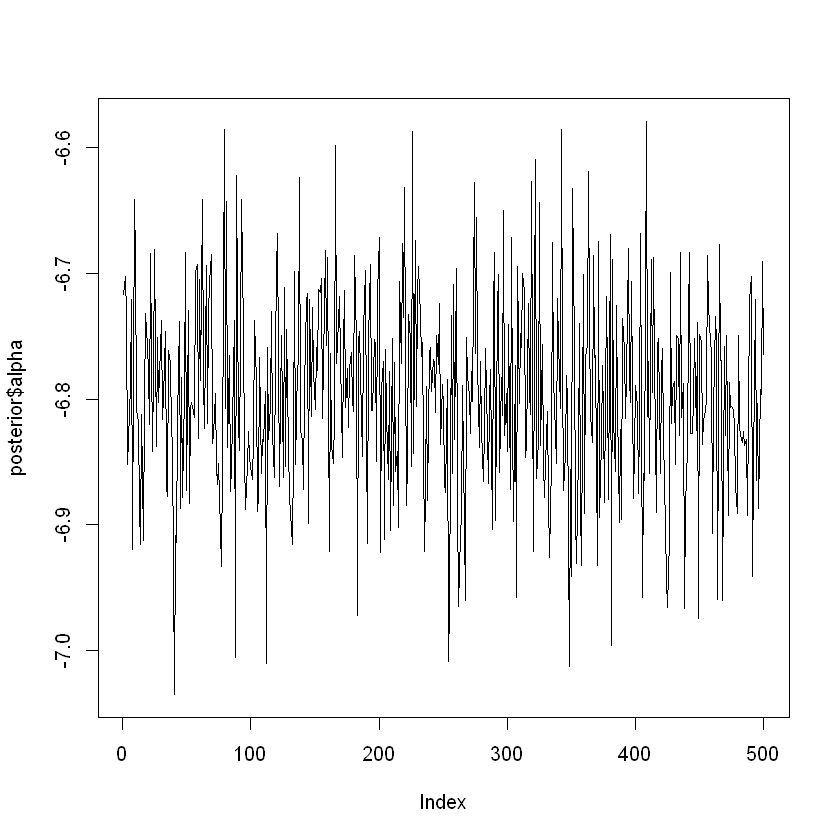

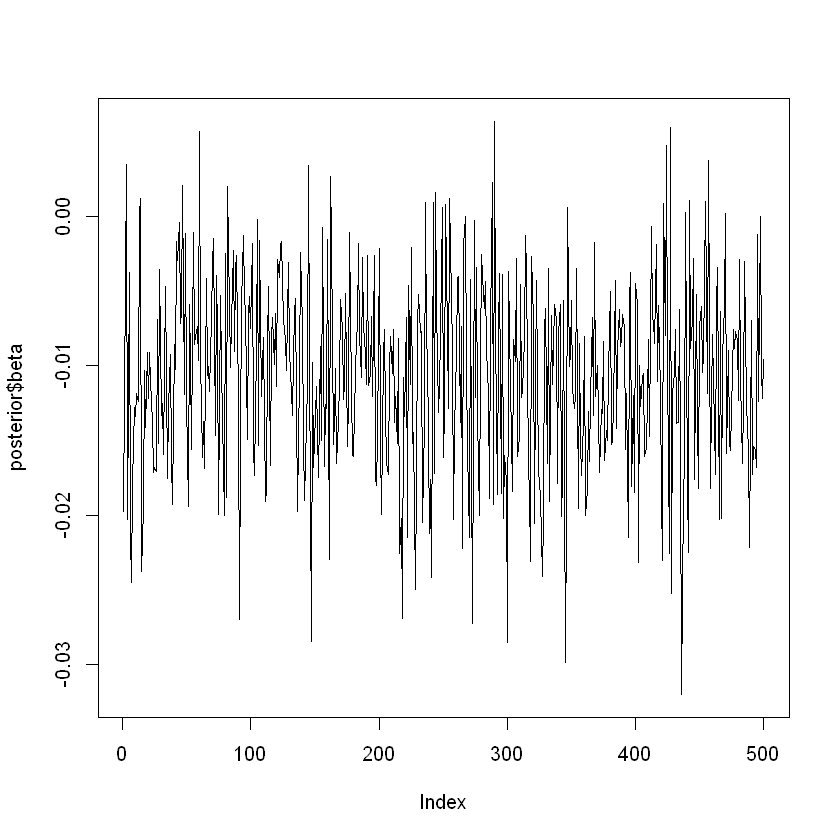

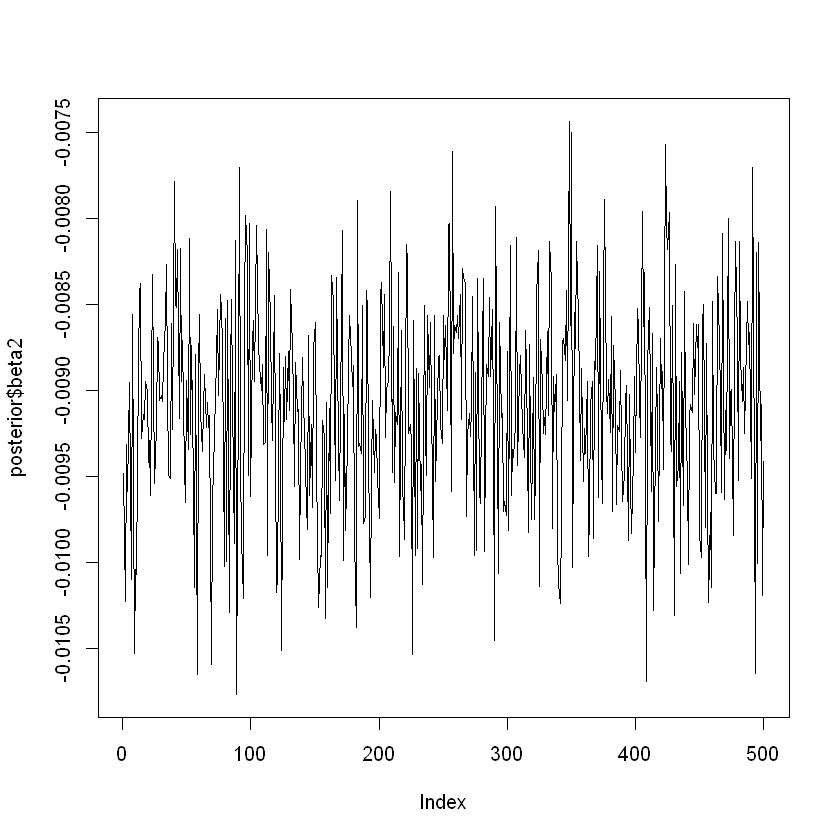

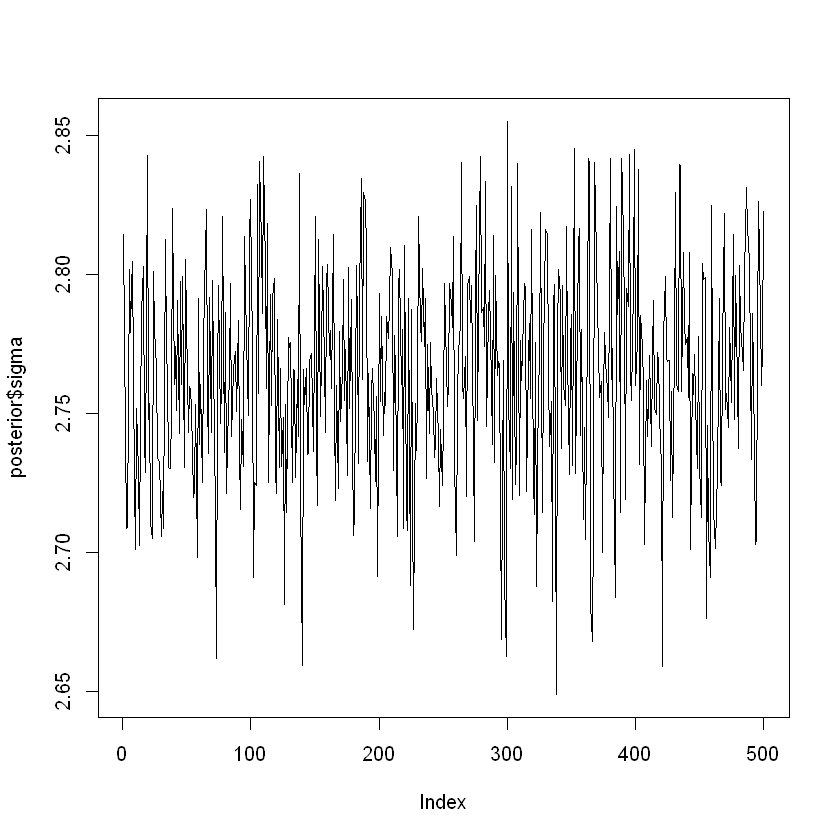

In [42]:
plot(posterior$alpha, type = "l")
plot(posterior$beta, type = "l")
plot(posterior$beta2, type = "l")
plot(posterior$sigma, type = "l")

In [58]:
### Now plot predictions vs real value:
china@data$predictions<-mean(posterior$alpha) + mean(posterior$beta)*china@data$BIO_09 + mean(posterior$beta2)*(china@data$BIO_09^2)

In [59]:
head(china@data$predictions)

[1] -7.160840 -7.225221 -7.064943 -7.441242 -7.333082 -7.105655

In [85]:
head(china@data$HrvstAF)

[1] 0.0006838690 0.0004574250 0.0002337314 0.0002365995 0.0002485567
[6] 0.0001085253

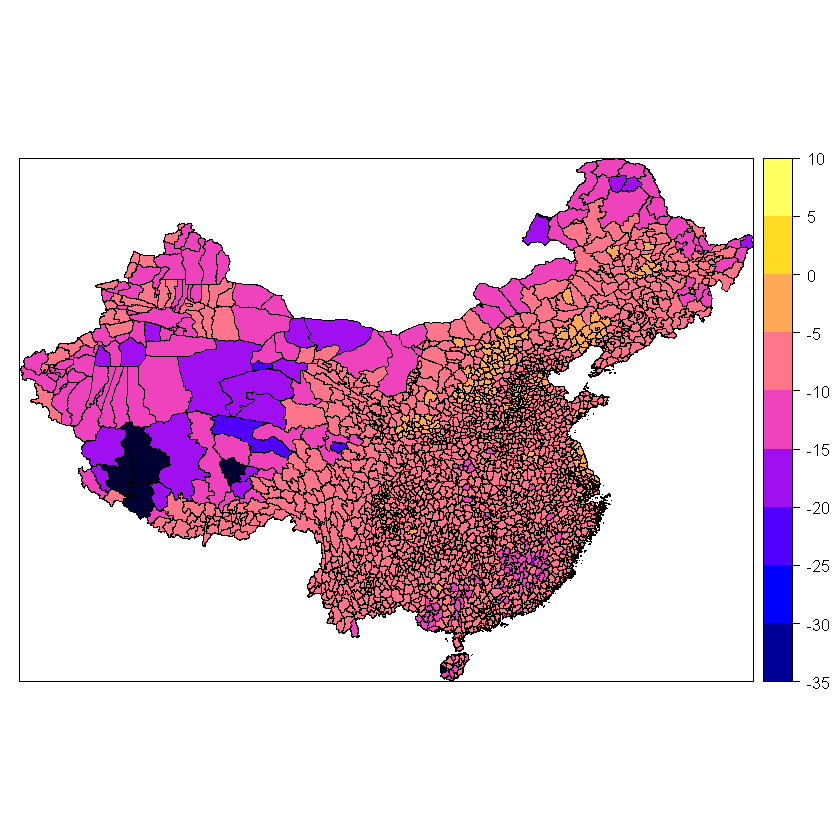

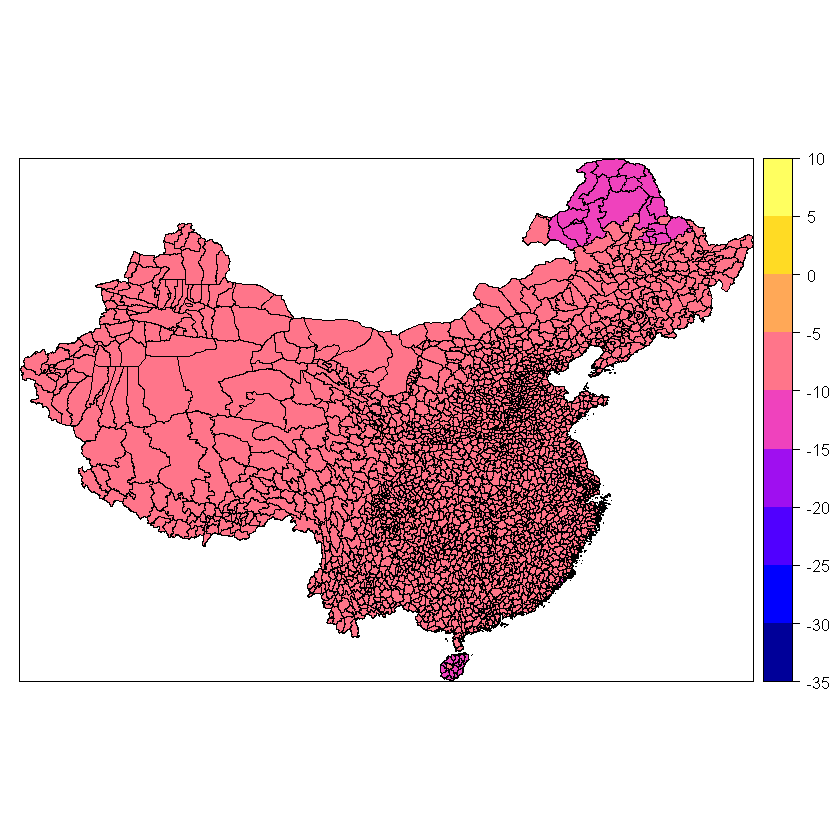

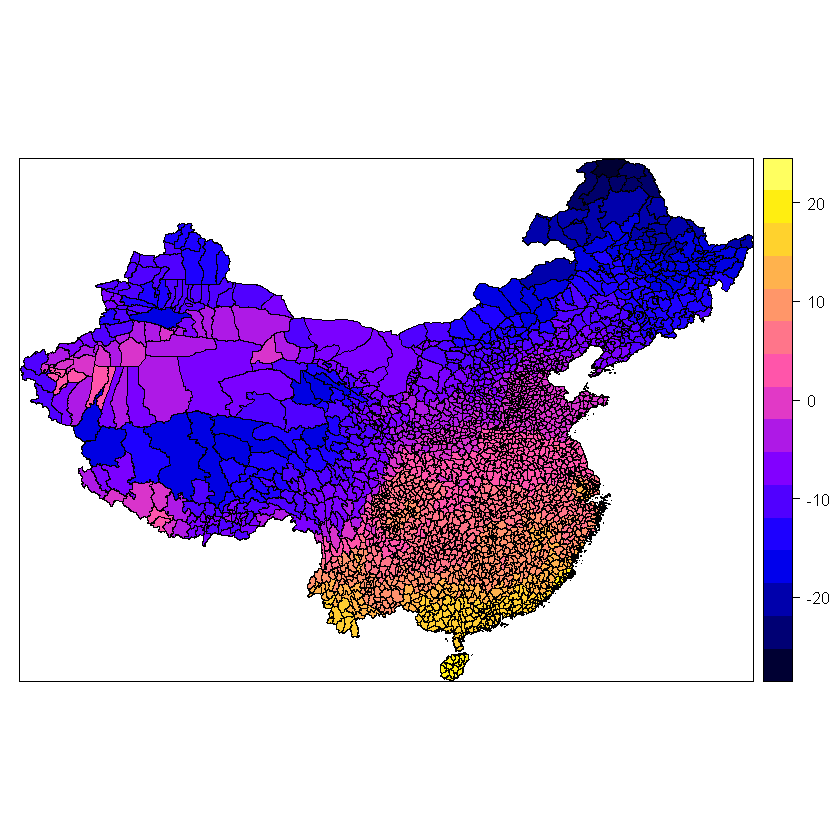

In [61]:
par(mfrow=c(1,2))

#at <- c(0,0.000015,0,0001,0.00015,0.005,0.01,0.015,0.02,0.025,0.03,0.035)
#at <- c(0.0015,0.05,0.1,0.15,0.2,0.25,0.3,0.35)
at<-c(-Inf,-35,-30,-25,-20,-15,-10,-5,0,5,10)
spplot(china['HrvsAF_'], at=at)
spplot(china['predictions'], at=at)

spplot(china['BIO_09'] )

In [78]:
write("// Stan model for simple linear (parabolic) regression

data {
 int < lower = 1 > N; // Sample size is an integer with the lowest value of 1 (i.e. positive)
 vector[N] x1; // Predictor is a vector of the size of sample size
 vector[N] x2; // Predictor is a vector of the size of sample size
 vector[N] x3; // Predictor is a vector of the size of sample size
 vector[N] x4; // Predictor is a vector of the size of sample size
 vector[N] x5; // Predictor is a vector of the size of sample size
 vector[N] x6; // Predictor is a vector of the size of sample size
 vector[N] y; // Outcome is a vector of a size of sample size
}

parameters {
 real alpha; // Intercept is an unconstrained continous value
 real beta1; // Slope (regression coefficients) is an unconstrained continous value
 real beta2; // Slope (regression coefficients) is an unconstrained continous value
 real beta3; // Slope (regression coefficients) is an unconstrained continous value
 real beta4; // Slope (regression coefficients) is an unconstrained continous value
 real beta5; // Slope (regression coefficients) is an unconstrained continous value
 real beta6; // Slope (regression coefficients) is an unconstrained continous value
 real beta7; // Slope (regression coefficients) is an unconstrained continous value
 real beta8; // Slope (regression coefficients) is an unconstrained continous value
 real beta9; // Slope (regression coefficients) is an unconstrained continous value
 real beta10; // Slope (regression coefficients) is an unconstrained continous value
 real beta11; // Slope (regression coefficients) is an unconstrained continous value
 real beta12; // Slope (regression coefficients) is an unconstrained continous value
 real < lower = 0 > sigma; // Error SD is an unconstrained positive continous valeu
}

model {
 log (y) ~ normal(alpha + x1 * beta1 + square(x1) * beta2 + x2 * beta3 + square(x2) * beta4 +
                          x3 * beta5 + square(x3) * beta6 + x4 * beta7 + square(x4) * beta8 +
                          x5 * beta9 + square(x5) * beta10 + x6 * beta11 + square(x6) * beta12, sigma); //this seem to declare the model
}
generated quantities {
} // The posterior predictive distribution",

"stan_models\\buckwheat_log_parabolic_regression.stan")

In [79]:
x1<-china@data$BIO_09
x2<-china@data$BIO_02
x3<-china@data$BIO_04
x4<-china@data$BIO_10
x5<-china@data$BIO_17
x6<-china@data$BIO_18
y<-china@data$HrvstAF
y[y == 0] <- 1.0e-14

In [80]:
stan_model <- "stan_models\\buckwheat_log_parabolic_regression.stan"

In [81]:
stan_data <- list(N = N, x1 = x1, y = y,x2=x2,x3=x3,x4=x4,x5=x5,x6=x6)

In [82]:
str(stan_data)

List of 8
 $ N : int 2409
 $ x1: num [1:2409] 5.76 6.29 4.86 7.84 7.11 ...
 $ y : num [1:2409] 0.000684 0.000457 0.000234 0.000237 0.000249 ...
 $ x2: num [1:2409] 7.99 8.82 8.7 8.12 8.69 ...
 $ x3: num [1:2409] 887 887 868 896 879 ...
 $ x4: num [1:2409] 27.5 27.4 26.1 27.8 26.8 ...
 $ x5: num [1:2409] 138 138 133 154 142 ...
 $ x6: num [1:2409] 591 600 630 540 608 ...


In [94]:
fit <- stan(file = stan_model, data = stan_data, warmup = 2000, iter = 10000, chains = 4, cores = 2, thin = 1)

recompiling to avoid crashing R session
Warning message:
"There were 7904 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"Warning message:
"There were 16026 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"Warning message:
"There were 3 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

In [95]:
fit

Inference for Stan model: buckwheat_log_parabolic_regression.
4 chains, each with iter=10000; warmup=2000; thin=1; 
post-warmup draws per chain=8000, total post-warmup draws=32000.

              mean    se_mean         sd         2.5%         25%      50%
alpha        -0.69       0.25       0.36        -1.22       -0.89    -0.65
beta1        -0.55       0.80       1.13        -1.73       -1.67    -0.53
beta2        -0.41       0.48       0.69        -1.60       -0.45    -0.02
beta3         0.21       0.98       1.39        -1.99       -0.39     0.53
beta4        -0.13       0.18       0.26        -0.58       -0.17    -0.01
beta5        -0.22       0.23       0.33        -0.83       -0.25    -0.06
beta6         0.00       0.00       0.00         0.00        0.00     0.00
beta7        -0.22       0.18       0.25        -0.45       -0.40    -0.31
beta8        -0.15       0.22       0.31        -0.74       -0.16     0.01
beta9         0.40       0.38       0.54        -0.07       -0.03   

In [88]:
posterior <- rstan::extract(fit)

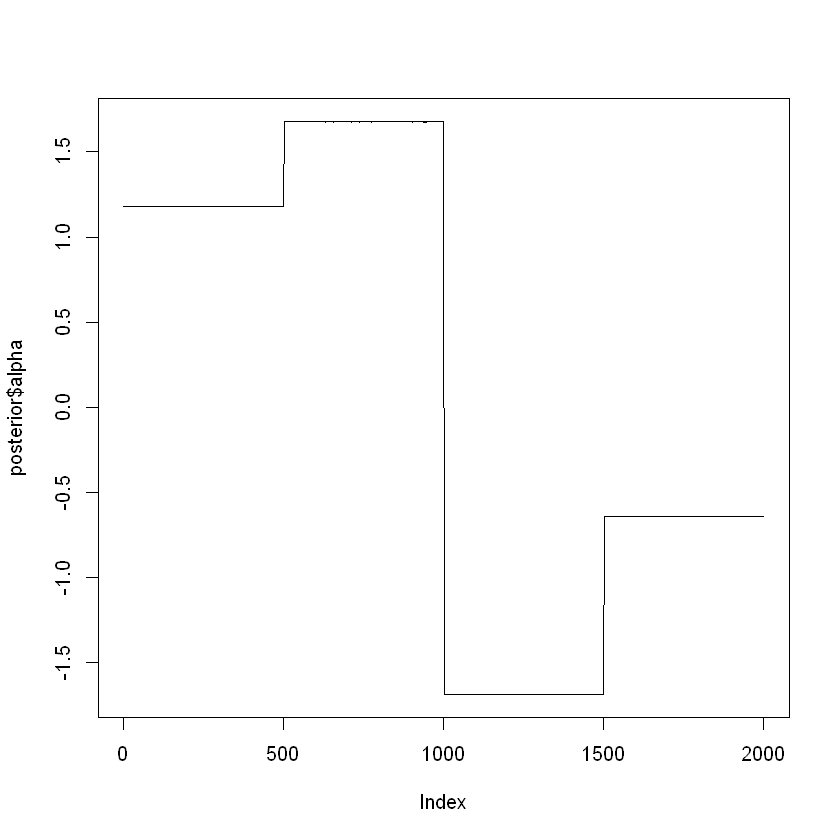

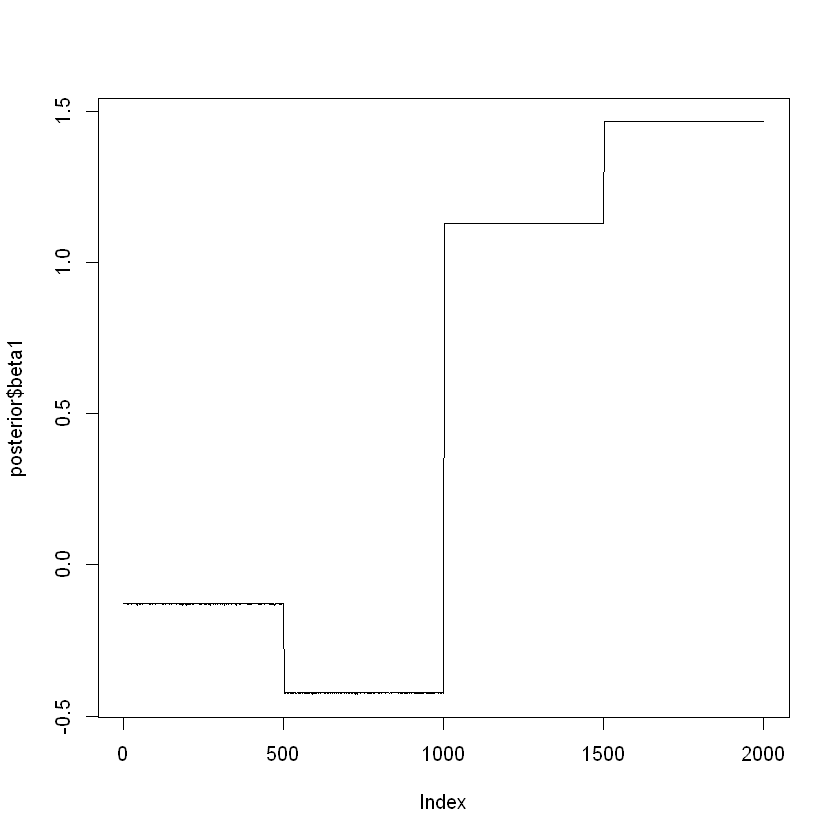

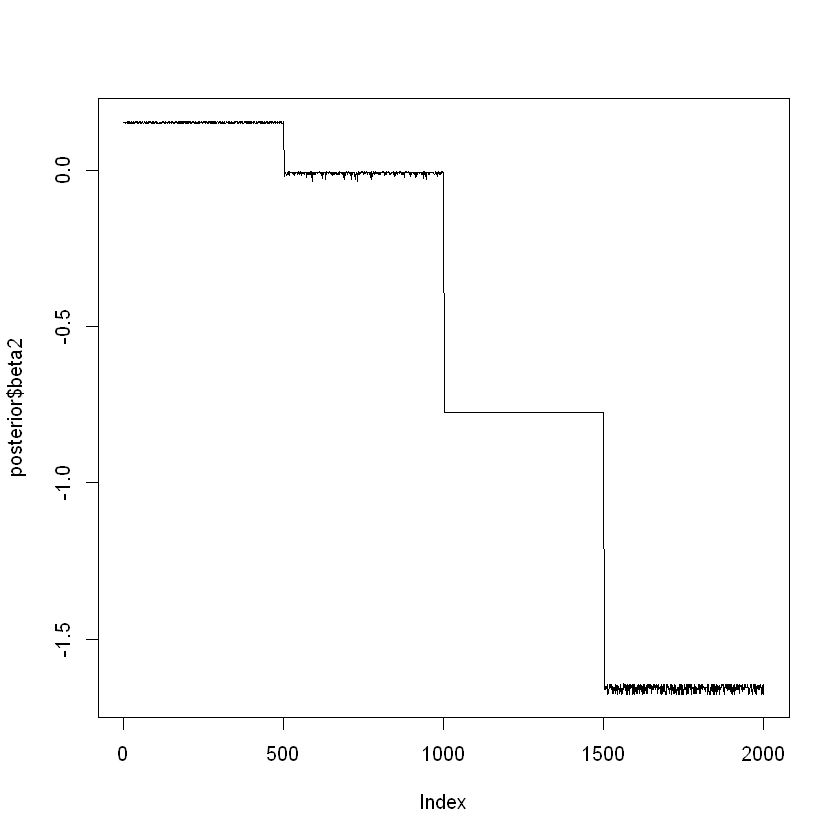

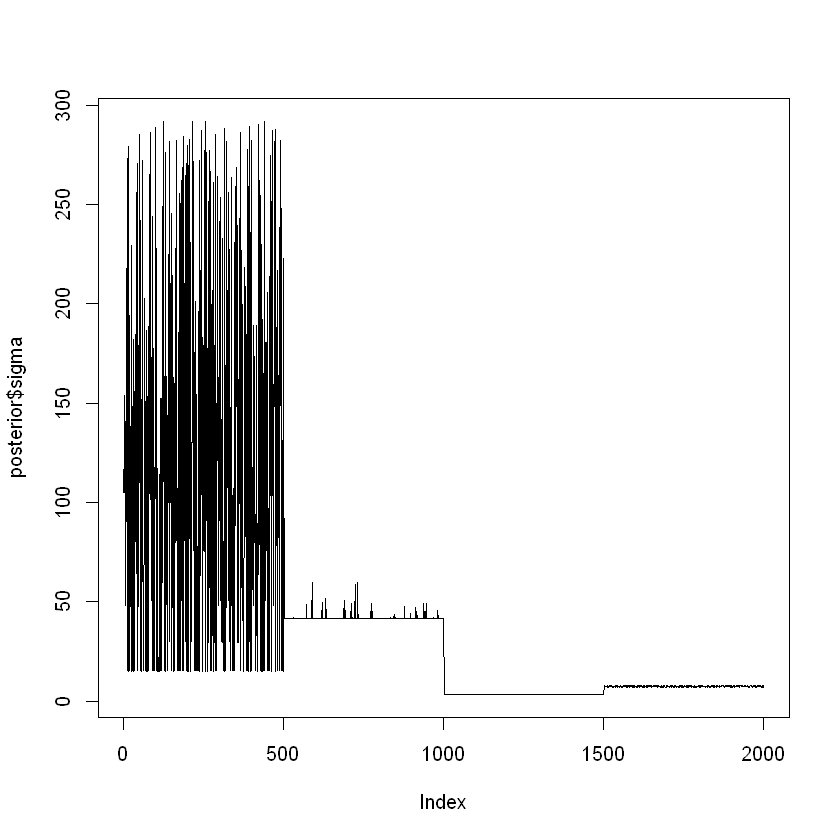

In [89]:
plot(posterior$alpha, type = "l")
plot(posterior$beta1, type = "l")
plot(posterior$beta2, type = "l")
plot(posterior$sigma, type = "l")

In [90]:
save(fit, file="stan_models\\buckwheat_log_parabolic_regression.R")

In [92]:
load("stan_models\\buckwheat_simple_BIO9_2.R")

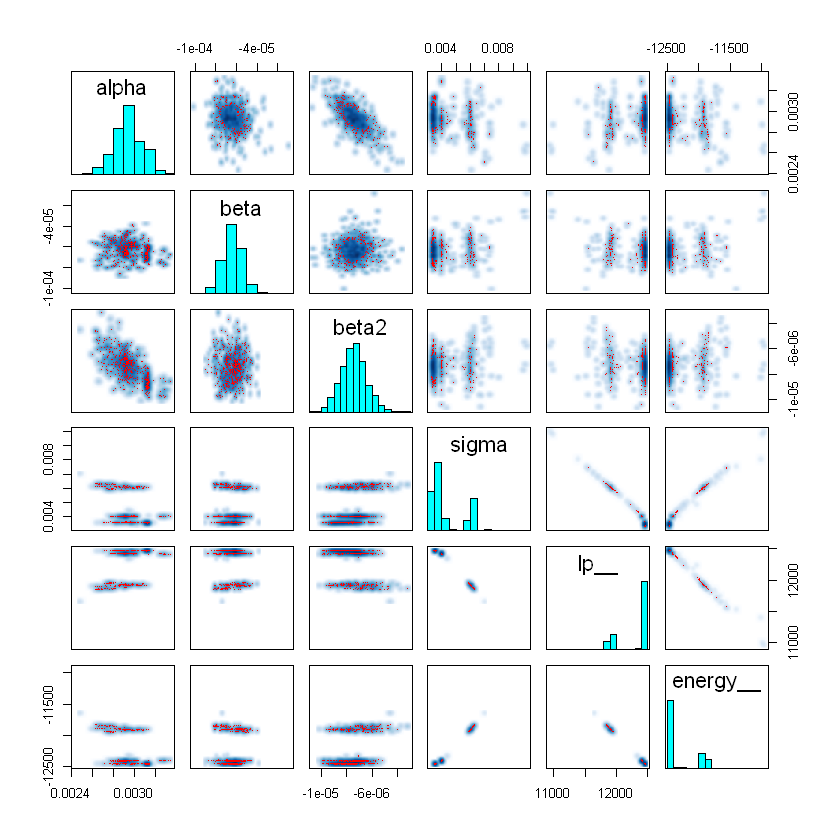

In [93]:
pairs(fit)

### Adding a spatial random effect to the model:

In [62]:
stan_model <- "stan_models\\buckwheat_simple_icar1.stan"

In [65]:
icar_stan = stan_model(stan_model);

In [66]:
fit_stan = sampling(icar_stan, data=list(N,N_edges,node1,node2), control=list(adapt_delta = 0.97, stepsize = 0.1), chains=2, warmup=9000, iter=10000, save_warmup=FALSE);


SAMPLING FOR MODEL 'buckwheat_simple_icar1' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Warmup)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Warmup)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Warmup)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Warmup)
Chain 1: Iteration: 9001 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1524.01 seconds (Warm-up)
Chain 1:                177.189 seconds (Sampling)
Chain 1:        

Warning message:
"There were 2000 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

In [67]:
save(fit_stan, file="stan_models\\buckwheat_simple_icar02.R")

### Write iCAR model with temperature as predictor:

In [ ]:
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size is an integer with the lowest value of 1 (i.e. positive)
 vector[N] x; // Predictor is a vector of the size of sample size
 vector[N] y; // Outcome is a vector of a size of sample size
}

parameters {
 real alpha; // Intercept is an unconstrained continous value
 real beta; // Slope (regression coefficients) is an unconstrained continous value
 real beta2; // Slope (regression coefficients) is an unconstrained continous value
 real < lower = 0 > sigma; // Error SD is an unconstrained positive continous valeu
}

model {
 log (y) ~ normal(alpha + x * beta + square(x) * beta2 , sigma); //this seem to declare the model
}
generated quantities {
} // The posterior predictive distribution",

"stan_models\\buckwheat_simple_log_BIO9_2.stan")

In [68]:
str(fit_stan)

Formal class 'stanfit' [package "rstan"] with 10 slots
  ..@ model_name: chr "buckwheat_simple_icar1"
  ..@ model_pars: chr [1:2] "phi" "lp__"
  ..@ par_dims  :List of 2
  .. ..$ phi : num 2409
  .. ..$ lp__: num(0) 
  ..@ mode      : int 0
  ..@ sim       :List of 12
  .. ..$ samples    :List of 2
  .. .. ..$ :List of 2410
  .. .. .. ..$ phi[1]   : num [1:1000] -0.959 -0.976 -0.972 -0.98 -0.962 ...
  .. .. .. ..$ phi[2]   : num [1:1000] -0.907 -0.902 -0.907 -0.932 -0.945 ...
  .. .. .. ..$ phi[3]   : num [1:1000] -1.87 -1.86 -1.86 -1.87 -1.87 ...
  .. .. .. ..$ phi[4]   : num [1:1000] -1.69 -1.68 -1.68 -1.66 -1.66 ...
  .. .. .. ..$ phi[5]   : num [1:1000] -0.933 -0.909 -0.922 -0.923 -0.917 ...
  .. .. .. ..$ phi[6]   : num [1:1000] -0.191 -0.205 -0.207 -0.201 -0.199 ...
  .. .. .. ..$ phi[7]   : num [1:1000] -1.04 -1.04 -1.03 -1.02 -1.03 ...
  .. .. .. ..$ phi[8]   : num [1:1000] -0.622 -0.624 -0.622 -0.637 -0.638 ...
  .. .. .. ..$ phi[9]   : num [1:1000] -1.06 -1.05 -1.06 -1.07 -1.